## Sujet : Identification d'un noyau cellulaire à partir de l'imagérie médicale

### Approche 1 : Utilisaation des filtres pour la détermination des features

### Importation des Bibliothèques

In [114]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Chémin d'accès, lecture de l'image cellulaire et conversion en niveau de gris

In [115]:
img = cv2.imread("C:/Users/Denis/Documents/MASTER2/Reconnaissance de formes/Projet/noyau_cellulaire/noyau_traite.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

### Utilisation du filtre Gabor pour la détermination des features

In [116]:
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                #print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

### Utilisation des filtres ROBERTS, SOBEL, MEDIAN, GAUSSIAN, PREWITT et SCHARR pour la détermination des features

In [117]:
from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1
print(edge_roberts1)

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1
print(edge_sobel1)

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1
print(edge_prewitt1)

#GAUSSIAN avec sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1
print(gaussian_img1)

#GAUSSIAN avec sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3
print(gaussian_img3)

#MEDIAN avec sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1
print(median_img1)

#VARIANCE avec size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe
print(variance_img1)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


### Accès au label de l'image cellulaire

In [118]:
labeled_img = cv2.imread("C:/Users/Denis/Documents/MASTER2/Reconnaissance de formes/Projet/noyau_cellulaire/noyau_traite.png_annotation.ome.tiff")

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Label'] = labeled_img1

#print(df.head())
#df.to_csv("datasetNoyau.csv")

Y = df["Label"].values #variable dependante qui devrait etre predit
X = df.drop(labels = ["Label"], axis=1) #variables independentes

### Subdivision de données en train et test, puis formation du modèle à l'aide de RandomForest

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

prediction_test_train = model.predict(X_train)
prediction_test = model.predict(X_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))

Accuracy =  0.7823342138463965
Accuracy on training data =  0.9931070283341219


### Affichage des features selon l'ordre d'importance

In [63]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp[1:10])

Gaussian s3    0.097958
Gabor23        0.043430
Median s3      0.041031
Roberts        0.040060
Gabor7         0.040031
Scharr         0.039451
Gabor21        0.039299
Sobel          0.039234
Prewitt        0.038132
dtype: float64


In [64]:
len(X_train)

304368

In [65]:
len(X_test)

202912

In [66]:
len(X)

507280

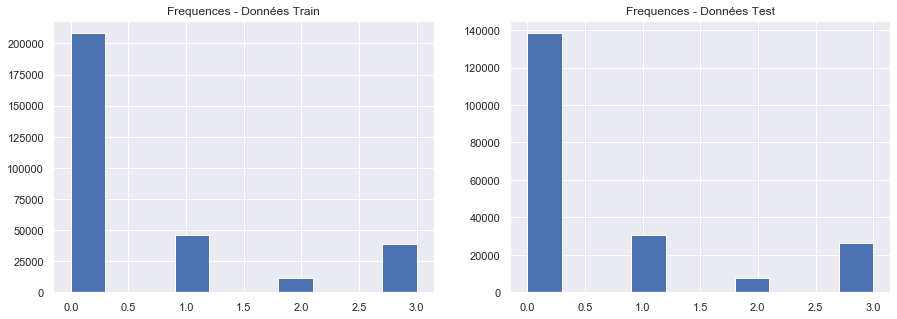

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequences - Données Train');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequences - Données Test');

### Segmentation de la cellule et identification du noyau

In [113]:
import pickle
from matplotlib import pyplot as plt

filename = "NoyauCellulaire_model"
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))
Img_Org = np.array(img)

### Evalulation du modèle : détermination de la matrice de confusion

In [69]:
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [70]:
def Matrice_Confusion(y_test, Test_predict):
    plt.figure(figsize=(8,5))
    conf_mat = confusion_matrix(y_test, Test_predict) #Calcul de la matrice de confusion
    ax = sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.ylabel('Label réel')
    plt.xlabel('Label prédit')
    precision_modele = accuracy_score(y_test, Test_predict) #Calcul de la précision du modèle
    print()
    print(f"La précision du modèle est de : {precision_modele}")
    print()
    print("LA MATRICE DE CONFUSION")
    print("***********************")


La précision du modèle est de : 0.7823342138463965

LA MATRICE DE CONFUSION
***********************


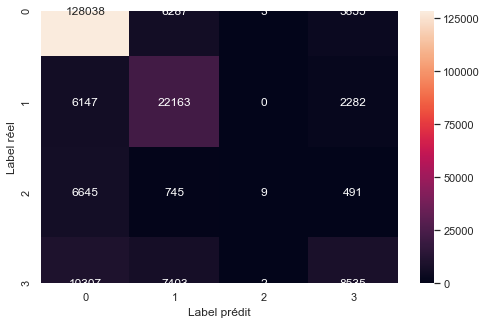

In [72]:
Test_predict = model.predict(X_test)
Matrice_Confusion(y_test, Test_predict)

### Approche 2 : Extraction des features à l'aide de PCA

In [73]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

In [74]:
X.shape

(507280, 42)

In [77]:
# Creation de l'objet scaler
sc = StandardScaler()

# Ajuster le scaler aux fonctionnalités(features)
X_std = sc.fit_transform(X)

In [78]:
# Creattion d'un objet PCA avec 10 composantes comme paramètre
pca = decomposition.PCA(n_components=10)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

In [79]:
# View the new feature data's shape
X_std_pca.shape

(507280, 10)

In [81]:
# View the new feature data
X_std_pca

array([[ 7.73889643, -0.89262879,  0.6498631 , ..., -0.02702185,
        -0.02321137, -0.07826371],
       [ 7.73889643, -0.89262879,  0.6498631 , ..., -0.02702185,
        -0.02321137, -0.07826371],
       [ 7.73889643, -0.89262879,  0.6498631 , ..., -0.02702185,
        -0.02321137, -0.07826371],
       ...,
       [ 7.73889643, -0.89262879,  0.6498631 , ..., -0.02702185,
        -0.02321137, -0.07826371],
       [ 7.73889643, -0.89262879,  0.6498631 , ..., -0.02702185,
        -0.02321137, -0.07826371],
       [ 7.73889643, -0.89262879,  0.6498631 , ..., -0.02702185,
        -0.02321137, -0.07826371]])

In [82]:
Y.shape

(507280,)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_std_pca, Y, test_size=0.4, random_state=20)

model2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
model2.fit(X_train, y_train)

prediction_test_train = model2.predict(X_train)
prediction_test = model2.predict(X_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))

Accuracy =  0.7568896861693739
Accuracy on training data =  0.9931103138306261


In [110]:
import pickle
from matplotlib import pyplot as plt

filename = "NoyauCellulaire_model"
pickle.dump(model2, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_std_pca)

segmented = result.reshape((img.shape))
Img_Org = np.array(img)


La précision du modèle est de : 0.7568896861693739

LA MATRICE DE CONFUSION
***********************


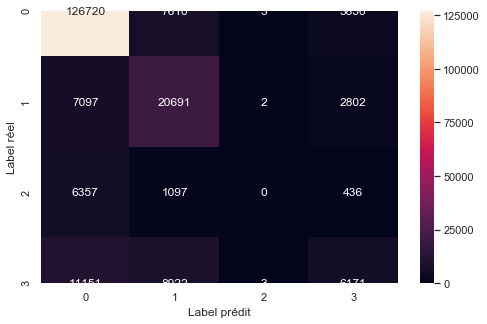

In [85]:
Test_predict = model2.predict(X_test) #Prédiction
Matrice_Confusion(y_test, Test_predict)

### Test de Classification

In [108]:
Img_Data = cv2.imread("C:/Users/Denis/Documents/MASTER2/Reconnaissance de formes/Projet/noyau_cellulaire/new/NewImage.tiff")
img_test = cv2.cvtColor(Img_Data, cv2.COLOR_BGR2GRAY)
img_test.shape

(680, 746)

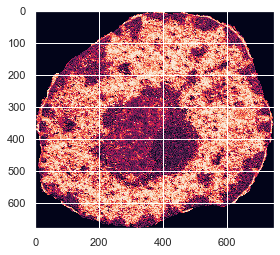

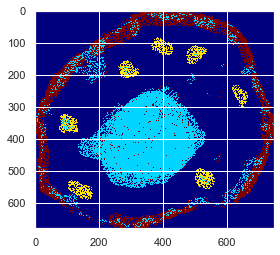

In [109]:
import pickle
from matplotlib import pyplot as plt
filename = "NoyauCellulaire_test"
pickle.dump(model, open(filename_test, 'wb'))

loaded_model_test = pickle.load(open(filename, 'rb'))
result = loaded_model_test.predict(X)

segmented_test = result.reshape((img_test.shape))
Img_Org = np.array(img_test)
plt.imshow(Img_Org)
plt.show()
plt.imshow(segmented_test, cmap ='jet')

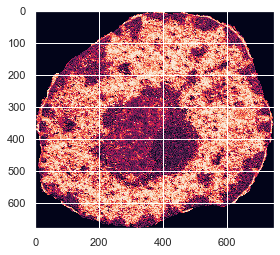

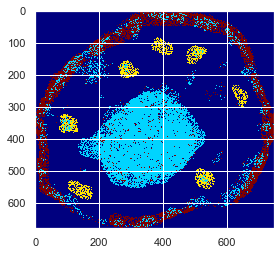

In [112]:
import pickle
from matplotlib import pyplot as plt

filename = "NoyauCellulaire_model"
pickle.dump(model2, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_std_pca)

segmented = result.reshape((img.shape))
Img_Org = np.array(img)
plt.imshow(Img_Org)
plt.show()
plt.imshow(segmented, cmap ='jet')